In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

In [2]:
# Carregando a imagem com o OpenCV
imagem  = cv2.imread('images/moon.jpg')
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

image.shape

(540, 466)

In [ ]:
# Carregando os kernels 

kernel_1 = np.array([[0, 1, 0],
                     [1,-4, 1],
                     [0, 1, 0]])

kernel_2 = np.array([[1, 1, 1],
                     [1,-8, 1],
                     [1, 1, 1]])

In [66]:
# Criando a função para gerar a imagem corrigida com laplaciano.
# Passa como parâmetros a imagem e o kernel 
def laplaciano(img, kernel):
    imagem_laplaciana = cv2.filter2D(src=img, ddepth=-1, kernel= kernel)
    c=-1
    g = image + c*imagem_laplaciana
    gclip = np.clip(g, 0, 255)

    return gclip


## Gerando a imagem 3.38(b) do livro

In [38]:
# Gerando o laplaciano sem ajuste
laplaciana_1 = cv2.filter2D(src=image, ddepth=-1, kernel= kernel_1)

## Gerando a imagem 3.38(c) do livro

In [63]:
# Calculando o Laplaciano em float para manter os valores negativos e criar o laplaciano ajustado
laplaciano_float = cv2.filter2D(src=image, ddepth=cv2.CV_64F, kernel=kernel_1)

In [64]:
# Encontrando o valor mínimo do array 
min_lap = np.min(laplaciano_float)

laplaciano_ajustado = laplaciano_float - min_lap

In [55]:
# Encontrando o novo valor máximo
max_lap_ajustado = np.max(laplaciano_ajustado)

# Normalizando
laplaciano_ajustado_final = (255 * (laplaciano_ajustado / max_lap_ajustado)).astype(np.uint8)

## Gerando as imagens 3.38(d) 3.38(e) do livro

In [65]:
# Criando as imagens corrigidas com os kernels 1 e 2.
imagem_corrigida_1 = laplaciano(image, kernel_1)
imagem_corrigida_2 = laplaciano(image, kernel_2)

## Plotando os resultados

Text(0.5, 1.0, 'Imagem Original')

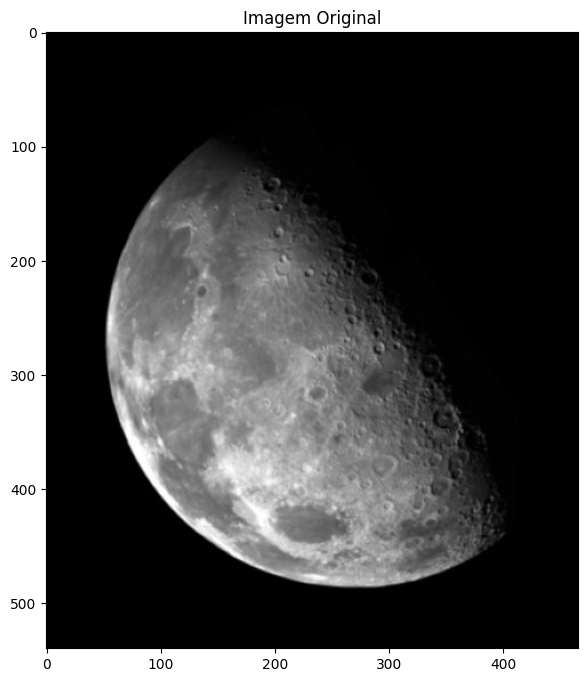

In [59]:
plt.figure(figsize=(10,8))
plt.imshow(image, 'gray')
plt.title('Imagem Original')

Text(0.5, 1.0, 'Laplaciano com ajuste')

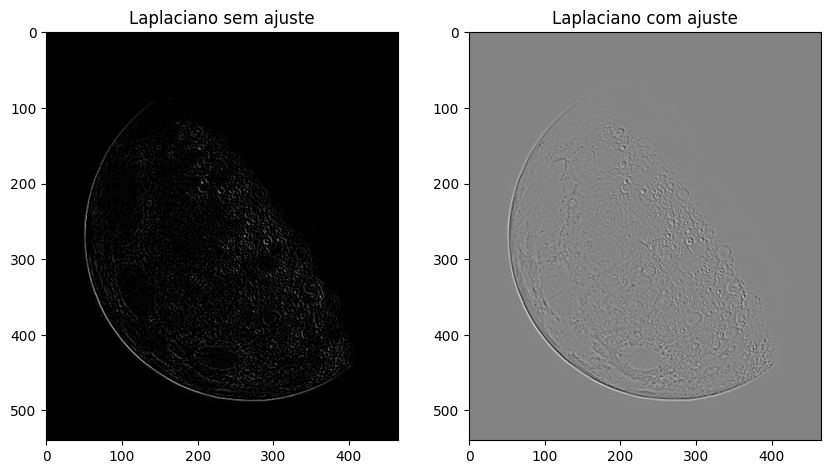

In [60]:
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
plt.imshow(laplaciana_1, 'gray')
plt.title('Laplaciano sem ajuste')

plt.subplot(1, 2, 2)
plt.imshow(laplaciano_ajustado_final, 'gray')
plt.title('Laplaciano com ajuste')


Text(0.5, 1.0, 'Kernel 2')

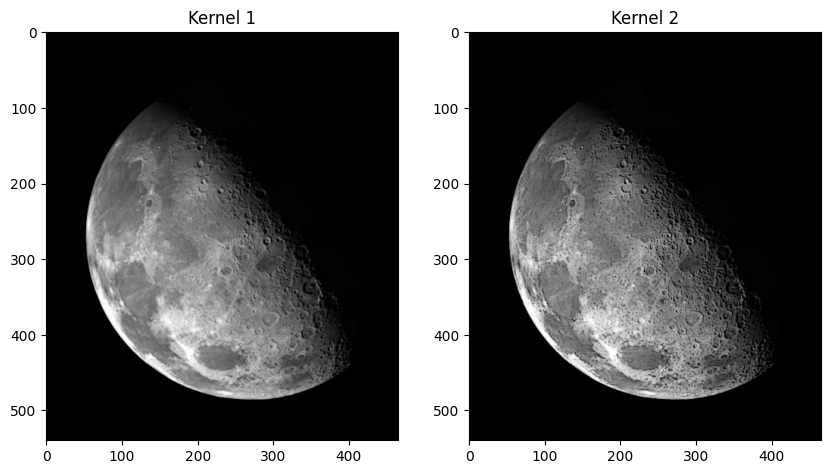

In [61]:
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
plt.imshow(imagem_corrigida_1, 'gray')
plt.title('Kernel 1')

plt.subplot(1, 2, 2)
plt.imshow(imagem_corrigida_2, 'gray')
plt.title('Kernel 2')
